Importing pandas ; Importing seaborn ; Importing monthly progress prediction by book value ; Importing monthly progress by book value error

In [1]:
import pandas as pd
import seaborn as sns
df_progress=pd.read_csv('../../data/output/monthly-progress-by-book-value/mean/past-prediction.csv',sep=';')
df_error=pd.read_csv('../../data/output/monthly-progress-by-book-value/error/AR.csv',sep=';')
df_progress=df_progress.set_index(['Year','Month'])
df_error=df_error.set_index(['Year','Month'])
print(df_progress.head())
print(df_error.head())

            Progress    2 Mean    3 Mean    4 Mean    5 Mean
Year Month                                                  
2017 1      0.819292  0.815852  0.818944  0.820148  0.821210
     2      0.826559  0.845961  0.851996  0.868132  0.851293
     3      0.852290  0.867682  0.874321  0.896171  0.877437
     4      0.921661  0.866694  0.887246  0.908608  0.889873
     5      0.944658  0.840485  0.874759  0.899192  0.876533
            Predicted AR 2 Error  Predicted AR 3 Error  Predicted AR 4 Error  \
Year Month                                                                     
2017 1                 -0.003440             -0.000348              0.000856   
     2                  0.019402              0.025437              0.041573   
     3                  0.015392              0.022032              0.043882   
     4                  0.008090              0.009693              0.028949   
     5                 -0.048150             -0.032469             -0.019517   

            

Generating adjusted progress prediction with autoregressive error columns

In [2]:
min_year=min(df_error.index.get_level_values('Year'))

df_progress=df_progress.drop(df_progress.index[df_progress.index.get_level_values('Year')<min_year])

for i,col in enumerate(df_error.columns):
    df_progress['AR '+str(i+2)+' Mean']=df_progress[str(i+2)+' Mean']+(df_error[col]*-1)
    df_progress['AR '+str(i+2)+' Mean']=df_progress['AR '+str(i+2)+' Mean'].fillna(df_progress[str(i+2)+' Mean'])

print(df_progress.head())

            Progress    2 Mean    3 Mean    4 Mean    5 Mean  AR 2 Mean  \
Year Month                                                                
2017 1      0.819292  0.815852  0.818944  0.820148  0.821210   0.819292   
     2      0.826559  0.845961  0.851996  0.868132  0.851293   0.826559   
     3      0.852290  0.867682  0.874321  0.896171  0.877437   0.852290   
     4      0.921661  0.866694  0.887246  0.908608  0.889873   0.858604   
     5      0.944658  0.840485  0.874759  0.899192  0.876533   0.888635   

            AR 3 Mean  AR 4 Mean  AR 5 Mean  
Year Month                                   
2017 1       0.819292   0.819292   0.819292  
     2       0.826559   0.826559   0.826559  
     3       0.852290   0.852290   0.852290  
     4       0.877553   0.879659   0.877987  
     5       0.907228   0.918709   0.912249  


Calculating auto regressive mean error ; Visualizing auto regressive mean error

AR 2 Mean Error
AR 3 Mean Error
AR 4 Mean Error
AR 5 Mean Error


<Axes: >

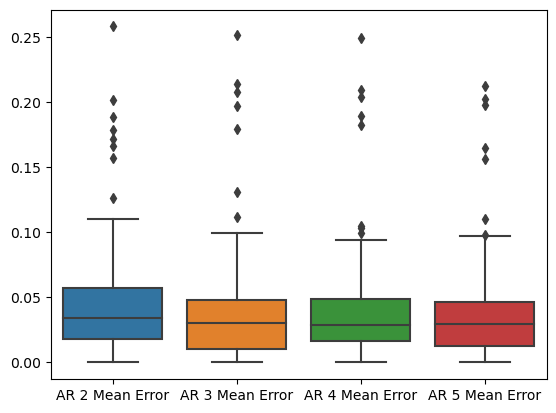

In [3]:
for i,col in enumerate(df_progress.columns[5:]):
    print(col+' Error')
    df_progress[col+' Error']=df_progress[col]-df_progress['Progress']

sns.boxplot(data=df_progress.abs().drop(columns=df_progress.columns[:9]))

Cleaning auto regressive mean error

There is a total of 37  outliers of  348  data
AR 2 Mean Error    0.034200
AR 3 Mean Error    0.029977
AR 4 Mean Error    0.030179
AR 5 Mean Error    0.026513
dtype: float64


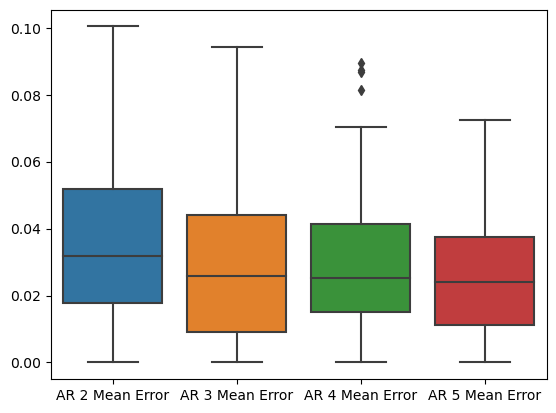

In [4]:
count_before=df_progress[df_progress.columns[9:]].count()

for i,col in enumerate(df_progress.columns[9:]):
    Q1 = df_progress[col].abs().quantile(0.25)
    Q3 = df_progress[col].abs().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.3 * IQR
    upper_bound = Q3 + 1.3 * IQR
    outlier_mask=(df_progress[col].abs()<lower_bound)|(df_progress[col].abs()>upper_bound)
    df_progress[col]=df_progress[col].mask(outlier_mask)
    
count_after=df_progress[df_progress.columns[9:]].count()

print('There is a total of',count_before.sum()-count_after.sum(),' outliers of ',count_before.sum(),' data')

sns.boxplot(data=df_progress[df_progress.columns[9:]].abs())
print(df_progress[df_progress.columns[9:]].abs().mean())

Exporting the progress dataframe csv

In [5]:
print(df_progress.head())
df_progress=df_progress.drop(columns=df_progress.columns[:5])
df_progress=df_progress.drop(columns=df_progress.columns[4:])
df_progress.to_csv('../../data/output/monthly-progress-by-book-value/mean/AR.csv',sep=';')

            Progress    2 Mean    3 Mean    4 Mean    5 Mean  AR 2 Mean  \
Year Month                                                                
2017 1      0.819292  0.815852  0.818944  0.820148  0.821210   0.819292   
     2      0.826559  0.845961  0.851996  0.868132  0.851293   0.826559   
     3      0.852290  0.867682  0.874321  0.896171  0.877437   0.852290   
     4      0.921661  0.866694  0.887246  0.908608  0.889873   0.858604   
     5      0.944658  0.840485  0.874759  0.899192  0.876533   0.888635   

            AR 3 Mean  AR 4 Mean  AR 5 Mean  AR 2 Mean Error  AR 3 Mean Error  \
Year Month                                                                      
2017 1       0.819292   0.819292   0.819292         0.000000         0.000000   
     2       0.826559   0.826559   0.826559         0.000000         0.000000   
     3       0.852290   0.852290   0.852290         0.000000         0.000000   
     4       0.877553   0.879659   0.877987        -0.063057        -